<a href="https://colab.research.google.com/github/Balathanushreddy/leetcodetest/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic - Machine Learning from Disaster

Predict survival on the Titanic and get familiar with ML basics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read training and testing data

In [3]:
train = pd.read_csv('/content/train.csv')

changing the column into index

In [7]:
train = train.set_index('PassengerId')

In [8]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Checking relationship between all the relationships between the columns

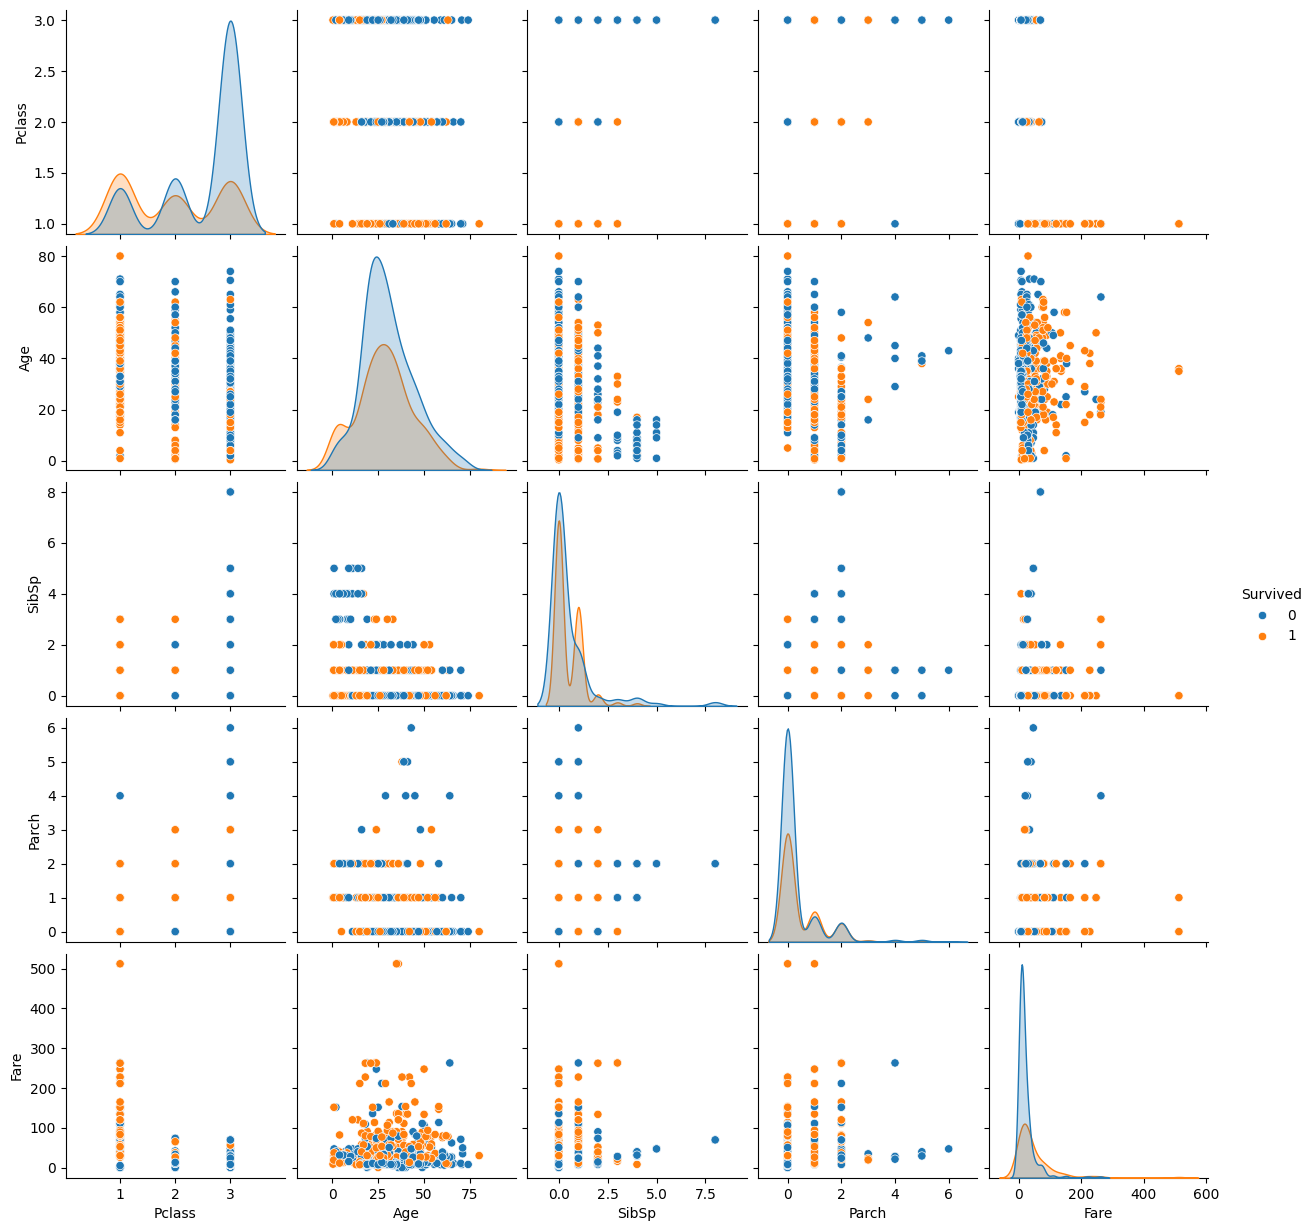

In [17]:
sns.pairplot(data=train,hue='Survived')

Let us Build Randomforestclassifier model

In [18]:
from sklearn.ensemble import RandomForestClassifier
X = train.drop('Survived',axis=1)
Y = train['Survived']

In [37]:

X = train.drop('Ticket',axis=1,inplace=True)

In [42]:
X = train.drop('Name',axis=1,inplace=True)

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
st_cols = train.select_dtypes(include=['object']).columns
for cols in st_cols:
  train[cols] = le.fit_transform(train[cols])

In [49]:
X = train.drop('Survived',axis=1)
Y = train['Survived']

In [50]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,1,22.0,1,0,7.2500,147,2
2,1,0,38.0,1,0,71.2833,81,0
3,3,0,26.0,0,0,7.9250,147,2
4,1,0,35.0,1,0,53.1000,55,2
5,3,1,35.0,0,0,8.0500,147,2


In [51]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X,Y)

RandomForestClassifier(random_state=1)

In [52]:
print("Training Accuracy:",rf.score(X,Y))

Training Accuracy: 0.9865319865319865


the training accuracy was 0.98

Let us Display the Graph of the RandomForrest classifier model we built

In [55]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

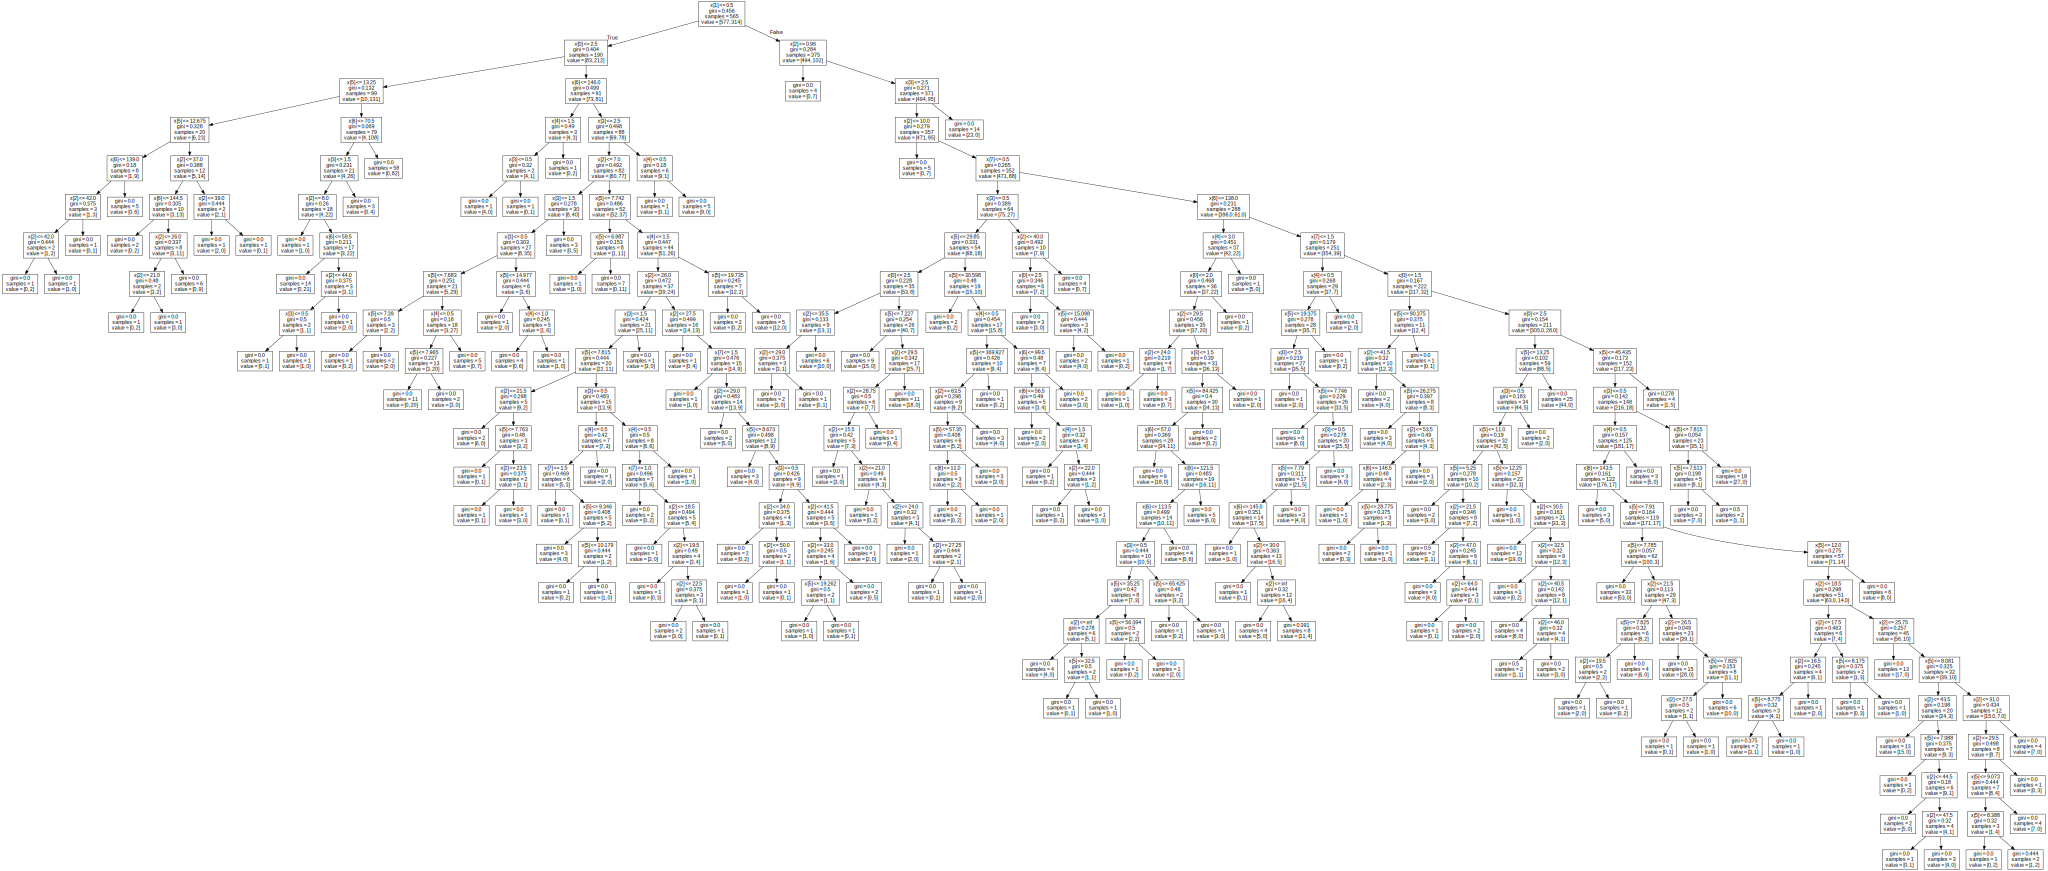

In [58]:
tree_idx = 0
tree = rf.estimators_[tree_idx]
dot_data = export_graphviz(tree)
graph = graphviz.Source(dot_data)
display(graph)

In [97]:
test = pd.read_csv('/content/test.csv')

In [98]:
test = test.set_index('PassengerId')

In [99]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [100]:
St_cols = test.select_dtypes(include=['object']).columns
for cols in st_cols:
  test[cols] = le.fit_transform(test[cols])

In [106]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
892,3,1,34.5,0,0,7.8292,76,1
893,3,0,47.0,1,0,7.0000,76,2
894,2,1,62.0,0,0,9.6875,76,1
895,3,1,27.0,0,0,8.6625,76,2
896,3,0,22.0,1,1,12.2875,76,2


In [107]:
y_pred = rf.predict(test)

In [108]:
print("predicitions:",y_pred)

predicitions: [0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1
 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0
 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 0 1 1]


In [110]:
output = pd.DataFrame({'PassengerId':test.index},{'Survived:':y_pred})
print(output)

           PassengerId
                   892
                   893
                   894
                   895
                   896
                   897
                   898
                   899
                   900
                   901
                   902
                   903
                   904
                   905
                   906
                   907
                   908
                   909
                   910
                   911
                   912
                   913
                   914
                   915
                   916
                   917
                   918
                   919
                   920
                   921
                   922
                   923
                   924
                   925
                   926
                   927
                   928
                   929
                   930
                   931
                   932
                   933
           